<a href="https://colab.research.google.com/github/Sedhuraman99/ML_algorithm/blob/main/Machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Text(0, 0.5, 'sales')

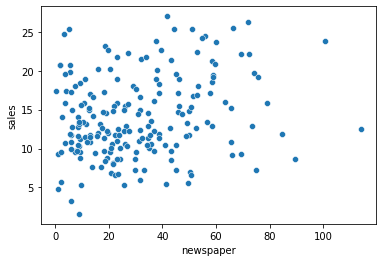

In [ ]:
sns.scatterplot(x='newspaper',y='sales',data=df)
plt.xlabel('newspaper')
plt.ylabel('sales')

In [ ]:
df[df['newspaper']>100]

,TV,radio,newspaper,sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [ ]:
df.drop(labels=16,axis=0,inplace=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
x = df.drop('sales',axis=1).values
y = df['sales'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [ ]:
x_vd, x_hot, y_vd, y_hot = train_test_split(x_test, y_test, test_size=0.5, random_state=7)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_vd = scaler.transform(x_vd)
x_hot = scaler.transform(x_hot)

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1,solver='auto', max_iter=100)
ridge_model.fit(x_train,y_train)
y_pred = ridge_model.predict(x_vd)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mean_absolute_error(y_vd,y_pred)

1.2278560183896237

In [ ]:
mean_squared_error(y_vd,y_pred)

2.4471760175938027

In [ ]:
r2_score(y_vd,y_pred)

0.8932046099708084

In [ ]:
df['sales'].mean()

13.98080808080808

In [ ]:
y_opred = ridge_model.predict(x_hot)

In [ ]:
mean_absolute_error(y_hot,y_opred)

1.3711882310154553

In [ ]:
r2_score(y_hot,y_opred)

0.9032646989567127

# ***Linear Regression***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/AMES_Final_DF.csv')
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df.shape

(2925, 274)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


In [ ]:
x = df.drop('SalePrice',axis=1).values
y = df['SalePrice'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [ ]:
x_vd, x_hot, y_vd, y_hot = train_test_split(x_test, y_test, test_size=0.5, random_state=7)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_vd = scaler.transform(x_vd)
x_hot = scaler.transform(x_hot)

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1)
ridge_model.fit(x_train,y_train)
y_pred = ridge_model.predict(x_vd)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mean_absolute_error(y_vd,y_pred)

16181.535199660524

In [ ]:
mean_squared_error(y_vd,y_pred)

723760473.1216958

In [ ]:
df['SalePrice'].mean()

180815.53743589742

In [ ]:
r2_score(y_vd,y_pred)

0.9177630733771506

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
cv_model = cross_validate(ridge_model,x_train,y_train,scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=10)

In [ ]:
pd.DataFrame(cv_model).mean()

fit_time                        1.977832e-02
score_time                      2.072954e-03
test_neg_mean_absolute_error   -1.519350e+04
test_neg_mean_squared_error    -4.940112e+08
test_max_error                 -1.107119e+05
dtype: float64

In [ ]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=1)

In [ ]:
y_predd = ridge_model.predict(x_vd)

In [ ]:
mean_absolute_error(y_vd,y_predd)

16181.535199660524

In [ ]:
r2_score(y_vd,y_predd)

0.9177630733771506

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'alpha':[100,110,120,130],'l1_ratio':[.1,.7,.9,.40,.99,1]}

In [ ]:
grid_model = GridSearchCV(estimator=elastic_model,param_grid=param_grid,scoring='neg_mean_absolute_error',cv=5,verbose=1)

In [ ]:
grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [100, 110, 120, 130],
                         'l1_ratio': [0.1, 0.7, 0.9, 0.4, 0.99, 1]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
grid_model.best_estimator_

ElasticNet(alpha=130, l1_ratio=1)

In [ ]:
grid_model.best_params_

{'alpha': 130, 'l1_ratio': 1}

In [ ]:
y_preddd = grid_model.predict(x_vd)

In [ ]:
mean_absolute_error(y_vd,y_preddd)

16032.839197459272

In [ ]:
r2_score(y_vd,y_preddd)

0.916857398959736

In [ ]:
y_opred = grid_model.predict(x_hot)

In [ ]:
mean_absolute_error(y_hot,y_opred)

14630.251165193085

In [ ]:
r2_score(y_hot,y_opred)

0.9281778486580081

# **Logistic Regression**

### model 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [ ]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


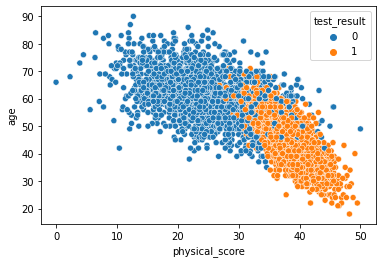

In [ ]:
sns.scatterplot(x='physical_score',y='age',data=df,hue='test_result')
plt.xlabel('physical_score')
plt.ylabel('age');

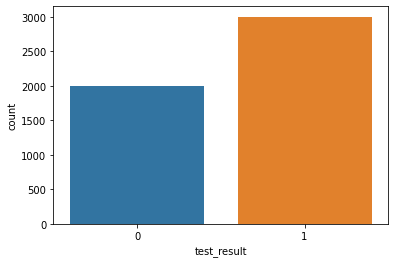

In [ ]:
sns.countplot(data=df,x='test_result');

In [ ]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [ ]:
x = df.drop('test_result',axis=1).values
y = df['test_result'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [ ]:
x_vd, x_ht, y_vd, y_ht = train_test_split(x_test, y_test, test_size=0.5, random_state=7)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_vd = scaler.transform(x_vd)
x_ht = scaler.transform(x_ht)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [ ]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
log_model.coef_

array([[-0.78759545,  3.55920913]])

In [ ]:
y_pred = log_model.predict(x_vd)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,plot_roc_curve

In [ ]:
accuracy_score(y_pred,y_vd)

0.924

In [ ]:
confusion_matrix(y_pred,y_vd)

array([[284,  17],
       [ 40, 409]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


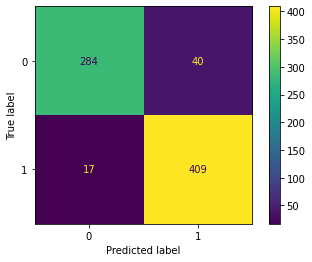

In [ ]:
plot_confusion_matrix(log_model,x_vd,y_vd)

### model 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
x = df.drop('target',axis=1).values
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [ ]:
x_vd, x_ht, y_vd, y_ht = train_test_split(x_test, y_test, test_size=0.5, random_state=8)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_vd = scaler.transform(x_vd)
x_ht = scaler.transform(x_ht)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='saga',multi_class='ovr'or'auto',max_iter=5000)

In [ ]:
param_grid = {'penalty':['l1','l2'],'C':np.logspace(0,4,10)}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [ ]:
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [ ]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [ ]:
y_pred = grid_model.predict(x_vd)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,plot_roc_curve

In [ ]:
accuracy_score(y_vd,y_pred)

0.6888888888888889

In [ ]:
confusion_matrix(y_vd,y_pred)

array([[12, 11],
       [ 3, 19]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


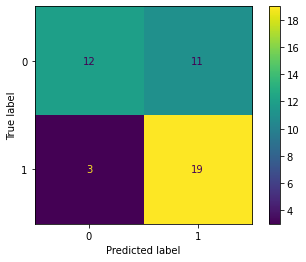

In [ ]:
plot_confusion_matrix(grid_model,x_vd,y_vd)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
x = df.drop('target',axis=1).values
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=7)

In [ ]:
x_vd, x_ht, y_vd, y_ht = train_test_split(x_test, y_test, test_size=0.5, random_state=9)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_vd = scaler.transform(x_vd)
x_ht = scaler.transform(x_ht)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
model = LogisticRegressionCV()

In [ ]:
model.fit(x_train,y_train)

LogisticRegressionCV()

In [ ]:
model.coef_

array([[-0.06550126, -0.41936424,  0.47814072, -0.18419427, -0.08845595,
         0.05605743,  0.13754955,  0.30050274, -0.378381  , -0.35910024,
         0.23389009, -0.45038467, -0.40781176]])

In [ ]:
y_predd = model.predict(x_ht)

In [ ]:
print(classification_report(y_ht,y_predd))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.60      1.00      0.75         6

    accuracy                           0.75        16
   macro avg       0.80      0.80      0.75        16
weighted avg       0.85      0.75      0.75        16



In [ ]:
y_opred = model.predict(x_vd)

In [ ]:
accuracy_score(y_vd,y_opred)

0.9333333333333333

In [ ]:
confusion_matrix(y_vd,y_opred)

array([[ 4,  0],
       [ 1, 10]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


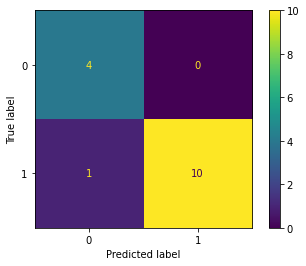

In [ ]:
plot_confusion_matrix(model,x_vd,y_vd)

In [ ]:
print(classification_report(y_vd,y_opred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.91      0.95        11

    accuracy                           0.93        15
   macro avg       0.90      0.95      0.92        15
weighted avg       0.95      0.93      0.94        15



### model 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
x = df.drop('species',axis=1).values
y = df['species'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:
x_vd, x_ht, y_vd, y_ht = train_test_split(x_test, y_test, test_size=0.5, random_state=9)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_vd = scaler.transform(x_vd)
x_ht = scaler.transform(x_ht)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'penalty':['l1','l2'],'C':np.logspace(0,3,10)}

In [ ]:
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [ ]:
grid_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ]),
                         'penalty': ['l1', 'l2']})

In [ ]:
y_pred = grid_model.predict(x_vd)

In [ ]:
grid_model.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,plot_roc_curve

In [ ]:
accuracy_score(y_vd,y_pred)

0.9333333333333333

In [ ]:
confusion_matrix(y_vd,y_pred)

array([[2, 0, 0],
       [0, 5, 1],
       [0, 0, 7]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


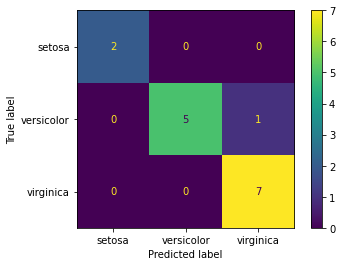

In [ ]:
plot_confusion_matrix(grid_model,x_vd,y_vd)

# **KNearestNeighbor**

### model 1

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('/content/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [ ]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


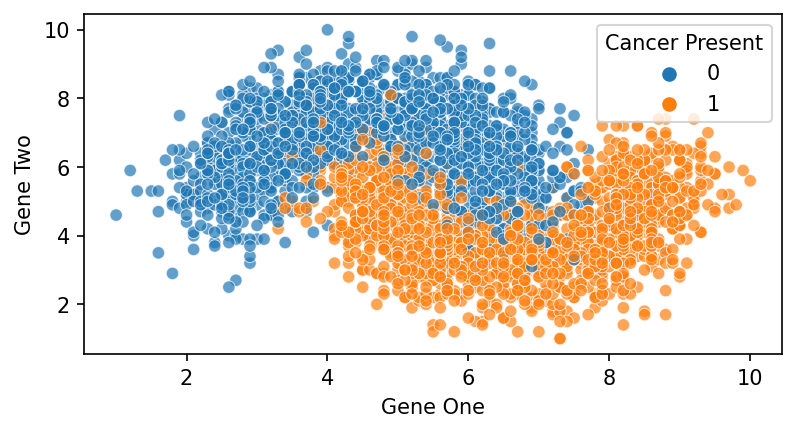

In [ ]:
plt.figure(figsize=(6,3),dpi=150)
sns.scatterplot(x='Gene One',y='Gene Two',data=df,hue='Cancer Present',alpha=0.7);

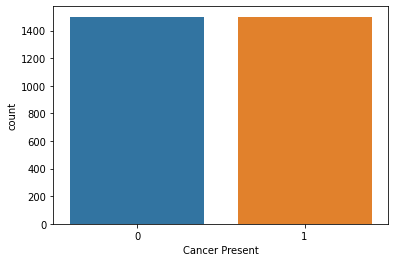

In [ ]:
sns.countplot(data=df,x='Cancer Present');

In [ ]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [ ]:
x = df.drop('Cancer Present',axis=1).values
y = df['Cancer Present'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:
x_vd, x_ht, y_vd, y_ht = train_test_split(x_test, y_test, test_size=0.5, random_state=8)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
operations = [('scaler',scaler),('knn',knn)]

In [ ]:
pipe = Pipeline(operations)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
k_values = list(range(1,31))

In [ ]:
param_grid = {'knn__n_neighbors':k_values}

In [ ]:
grid_model = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [ ]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

In [ ]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=15))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=15),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 15,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [ ]:
grid_model.cv_results_['mean_test_score']

array([0.91083333, 0.90708333, 0.92291667, 0.92291667, 0.92666667,
       0.92625   , 0.92791667, 0.9275    , 0.92708333, 0.92458333,
       0.92666667, 0.92583333, 0.92833333, 0.9275    , 0.93125   ,
       0.93125   , 0.92958333, 0.93      , 0.92875   , 0.92833333,
       0.92666667, 0.9275    , 0.92708333, 0.92875   , 0.92958333,
       0.92916667, 0.92958333, 0.92958333, 0.92916667, 0.92833333])

In [ ]:
y_pred = grid_model.predict(x_vd)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,plot_roc_curve

In [ ]:
accuracy_score(y_vd,y_pred)

0.9566666666666667

In [ ]:
confusion_matrix(y_vd,y_pred)

array([[142,   8],
       [  5, 145]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


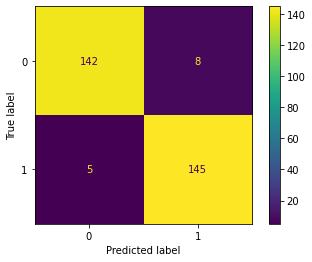

In [ ]:
plot_confusion_matrix(grid_model,x_vd,y_vd)

### model 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sonar.all-data.csv')
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [ ]:
df.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
df.isnull().sum()

Freq_1     0
Freq_2     0
Freq_3     0
Freq_4     0
Freq_5     0
          ..
Freq_57    0
Freq_58    0
Freq_59    0
Freq_60    0
Label      0
Length: 61, dtype: int64

In [ ]:
x = df.drop('Label',axis=1).values
y = df['Label'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)

In [ ]:
x_vd, x_ht, y_vd, y_ht = train_test_split(x_test, y_test, test_size=0.5, random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
operations = [('scaler',scaler),('knn',knn)]

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
k_values = list(range(1,31))

In [ ]:
param_grid = {'knn__n_neighbors':k_values}

In [ ]:
grid_model = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [ ]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

In [ ]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [ ]:
y_opred = grid_model.predict(x_ht)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,plot_roc_curve

In [ ]:
accuracy_score(y_ht,y_opred)

0.9090909090909091

In [ ]:
confusion_matrix(y_ht,y_opred)

array([[6, 0],
       [1, 4]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


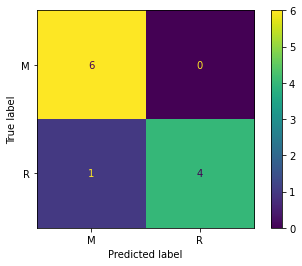

In [ ]:
plot_confusion_matrix(grid_model,x_ht,y_ht)

In [ ]:
print(classification_report(y_ht,y_opred))

              precision    recall  f1-score   support

           M       0.86      1.00      0.92         6
           R       1.00      0.80      0.89         5

    accuracy                           0.91        11
   macro avg       0.93      0.90      0.91        11
weighted avg       0.92      0.91      0.91        11



# **SVM Regressionr**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/cement_slump.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [ ]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.038738
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.837120
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


In [ ]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

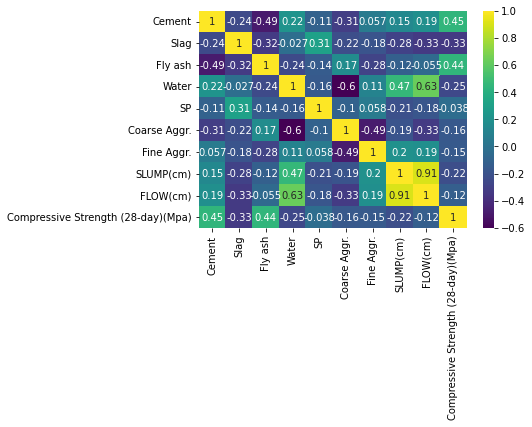

In [ ]:
sns.heatmap(data=df.corr(),annot=True,cmap='viridis');

In [ ]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [ ]:
x = df.drop('Compressive Strength (28-day)(Mpa)',axis=1).values
y = df['Compressive Strength (28-day)(Mpa)'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:
x_vd, x_ht, y_vd, y_ht = train_test_split(x, y, test_size=0.5, random_state=7)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_vd = scaler.transform(x_vd)
x_ht = scaler.transform(x_ht)

In [ ]:
from sklearn.svm import SVR
svr_model = SVR()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.5,1,2,3],'kernel':['linear'],'gamma':['scale'],'degree':[1,2,3],'epsilon':[1,2,3,4]}

In [ ]:
grid_model = GridSearchCV(svr_model,param_grid)

In [ ]:
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.5, 1, 2, 3], 'degree': [1, 2, 3],
                         'epsilon': [1, 2, 3, 4], 'gamma': ['scale'],
                         'kernel': ['linear']})

In [ ]:
grid_model.best_params_

{'C': 3, 'degree': 1, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
y_opred = grid_model.predict(x_ht)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mean_absolute_error(y_opred,y_ht)

1.9360582253150964

In [ ]:
np.sqrt(mean_squared_error(y_opred,y_ht))

2.423833297974442

In [ ]:
df['Compressive Strength (28-day)(Mpa)'].mean()

36.03873786407767

In [ ]:
r2_score(y_opred,y_ht)

0.8924200965607968

# **SVM Classification**

### model 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [ ]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


In [ ]:
df.corr()['Virus Present']

Med_1_mL        -0.922304
Med_2_mL        -0.903718
Virus Present    1.000000
Name: Virus Present, dtype: float64

In [ ]:
df.isnull().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

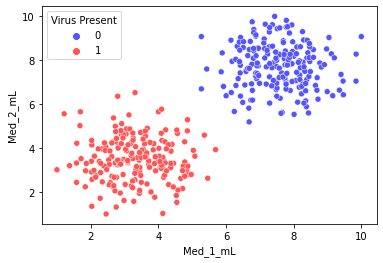

In [ ]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',data=df,hue='Virus Present',palette='seismic');

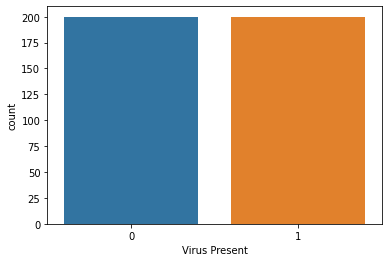

In [ ]:
sns.countplot(x='Virus Present',data=df);

In [ ]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

In [ ]:
x = df.drop('Virus Present',axis=1).values
y = df['Virus Present'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:
x_vd, x_ht, y_vd, y_ht = train_test_split(x, y, test_size=0.5, random_state=7)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_vd = scaler.transform(x_vd)
x_ht = scaler.transform(x_ht)

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0,0.01,0.1,0.5,1],'kernel':['linear','poly','rbf'],'gamma':['scale','auto'],'degree':[1,2,3]}

In [ ]:
grid_model = GridSearchCV(svc_model,param_grid)

In [ ]:
grid_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0, 0.01, 0.1, 0.5, 1], 'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
grid_model.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
grid_model.best_score_

1.0

In [ ]:
y_pred = grid_model.predict(x_vd)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,plot_roc_curve

In [ ]:
accuracy_score(y_pred,y_vd)

1.0

In [ ]:
confusion_matrix(y_pred,y_vd)

array([[101,   0],
       [  0,  99]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


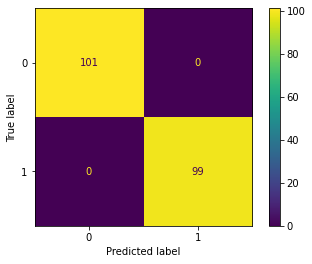

In [ ]:
plot_confusion_matrix(grid_model,x_vd,y_vd)

In [ ]:
print(classification_report(y_pred,y_vd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        99

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### model 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/wine_fraud.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [ ]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [ ]:
df['Quality']= df['quality'].map({'Legit':0,'Fraud':1})

In [ ]:
df = df.drop('quality',axis=1)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
Quality                 0
dtype: int64

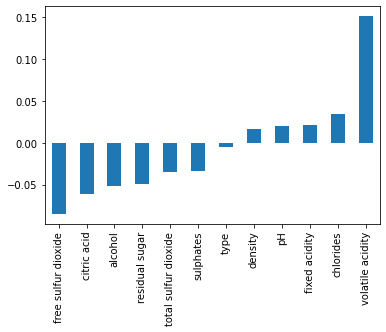

In [ ]:
df.corr()['Quality'][:-1].sort_values().plot(kind='bar')

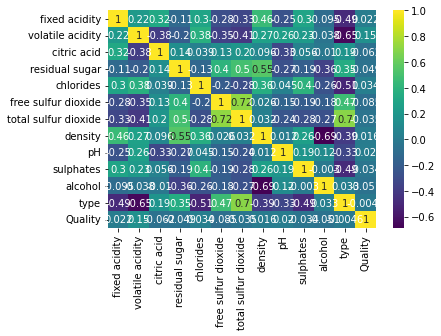

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='viridis');

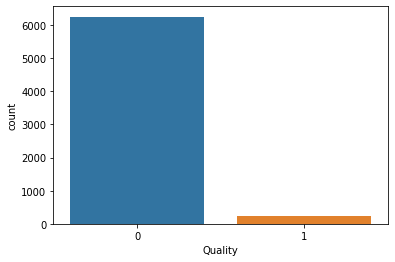

In [ ]:
sns.countplot(x='Quality',data=df);

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'Quality'],
      dtype='object')

In [ ]:
x = df.drop('Quality',axis=1).values
y = df['Quality'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=7)

In [ ]:
x_vd, x_ht, y_vd, y_ht = train_test_split(x, y, test_size=0.5, random_state=7)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_vd = scaler.transform(x_vd)
x_ht = scaler.transform(x_ht)

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(class_weight='balanced')

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0,0.01,0.1,0.5,1],'kernel':['linear','poly','rbf'],'gamma':['scale','auto'],'degree':[1,2,3]}

In [ ]:
grid_model = GridSearchCV(svc_model,param_grid)

In [ ]:
grid_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0, 0.01, 0.1, 0.5, 1], 'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
grid_model.best_params_

{'C': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}

In [ ]:
grid_model.best_score_

0.9211535902553868

In [ ]:
y_pred = grid_model.predict(x_vd)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,plot_roc_curve

In [ ]:
accuracy_score(y_pred,y_vd)

0.9245689655172413

In [ ]:
confusion_matrix(y_pred,y_vd)

array([[2960,   80],
       [ 165,   43]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


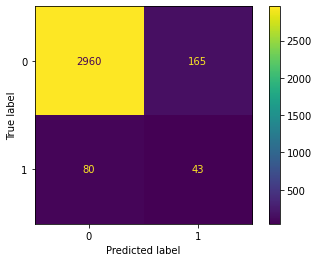

In [ ]:
plot_confusion_matrix(grid_model,x_vd,y_vd)

In [ ]:
print(classification_report(y_pred,y_vd))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3040
           1       0.35      0.21      0.26       208

    accuracy                           0.92      3248
   macro avg       0.65      0.59      0.61      3248
weighted avg       0.91      0.92      0.92      3248



In [ ]:
y_opred = grid_model.predict(x_ht)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,plot_roc_curve

In [ ]:
accuracy_score(y_opred,y_ht)

0.925207756232687

In [ ]:
confusion_matrix(y_opred,y_ht)

array([[2964,   81],
       [ 162,   42]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


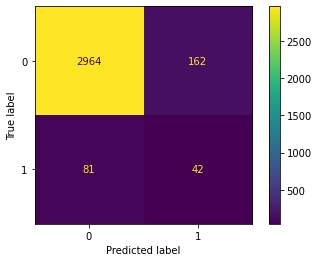

In [ ]:
plot_confusion_matrix(grid_model,x_ht,y_ht)

In [ ]:
print(classification_report(y_opred,y_ht))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3045
           1       0.34      0.21      0.26       204

    accuracy                           0.93      3249
   macro avg       0.64      0.59      0.61      3249
weighted avg       0.91      0.93      0.92      3249



# **Random Forest**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/data_banknote_authentication.csv')
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
df.describe()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


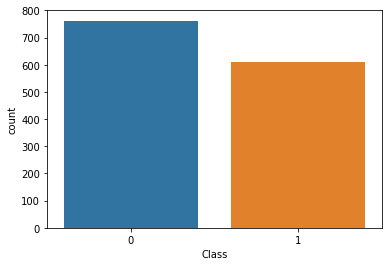

In [ ]:
sns.countplot(x='Class',data=df);

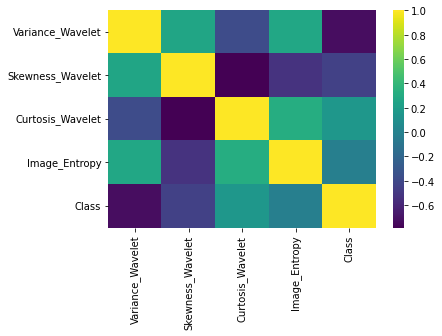

In [ ]:
sns.heatmap(df.corr(),cmap='viridis');

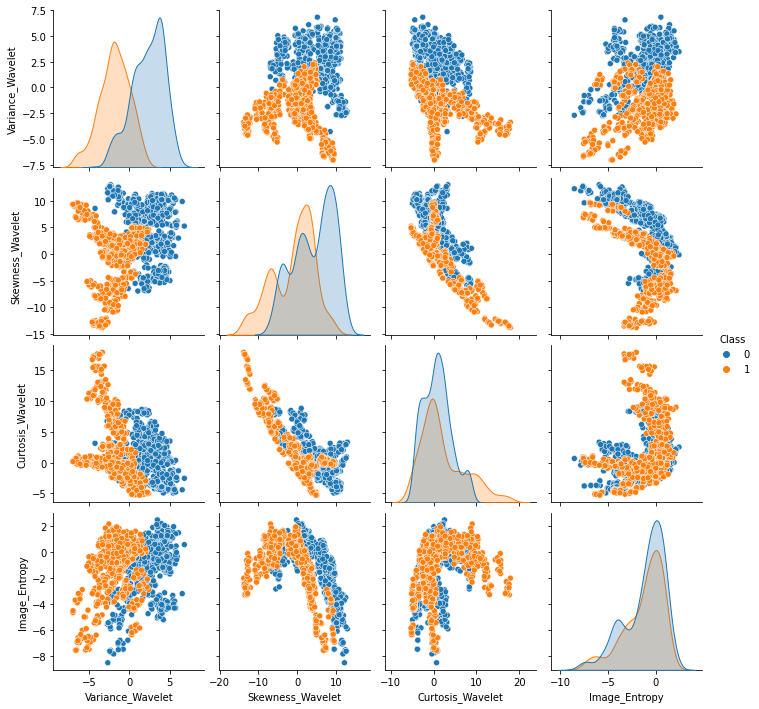

In [ ]:
sns.pairplot(df,hue='Class');

In [ ]:
x = df.drop('Class',axis=1).values
y = df['Class'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=7)

In [ ]:
x_vd, x_ht, y_vd, y_ht = train_test_split(x_test, y_test, test_size=0.5, random_state=7)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_vd = scaler.transform(x_vd)
x_ht = scaler.transform(x_ht)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_estimators':[64,88,105,130],'max_features':[2,3,4],'bootstrap':[True,False],'oob_score':[True,False]}

In [ ]:
grid_model = GridSearchCV(rfc_model,param_grid)

In [ ]:
grid_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/p

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 88, 105, 130],
                         'oob_score': [True, False]})

In [ ]:
grid_model.best_params_

{'bootstrap': False,
 'max_features': 2,
 'n_estimators': 105,
 'oob_score': False}

In [ ]:
y_pred = grid_model.predict(x_vd)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,plot_roc_curve

In [ ]:
accuracy_score(y_pred,y_vd)

1.0

In [ ]:
confusion_matrix(y_pred,y_vd)

array([[41,  0],
       [ 0, 28]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


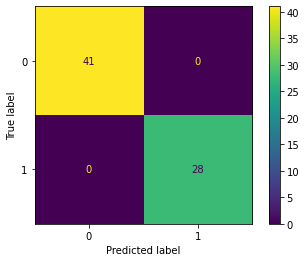

In [ ]:
plot_confusion_matrix(grid_model,x_vd,y_vd)

In [ ]:
print(classification_report(y_pred,y_vd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        28

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [ ]:
grid_model.best_estimator_.oob_score

False

In [ ]:
errors = []
misclassifications = []

for n in range(1,130):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 4)
    rfc.fit(x_train,y_train)
    preds = rfc.predict(x_vd)
    err = 1 - accuracy_score(y_pred,y_vd)
    n_missed = np.sum(preds != y_vd) 
    errors.append(err)
    misclassifications.append(n_missed)

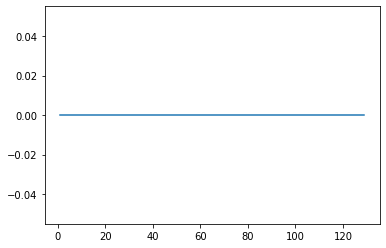

In [ ]:
plt.plot(range(1,130),errors)

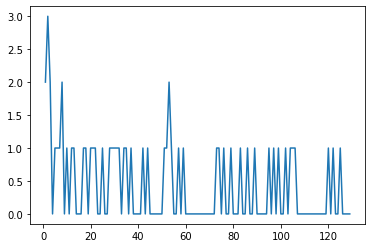

In [ ]:
plt.plot(range(1,130),misclassifications)

# **Gradient Boosted Decision Tree**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


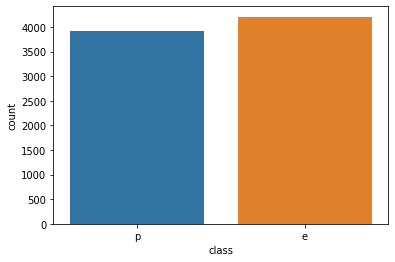

In [ ]:
sns.countplot(data=df,x='class');

In [ ]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

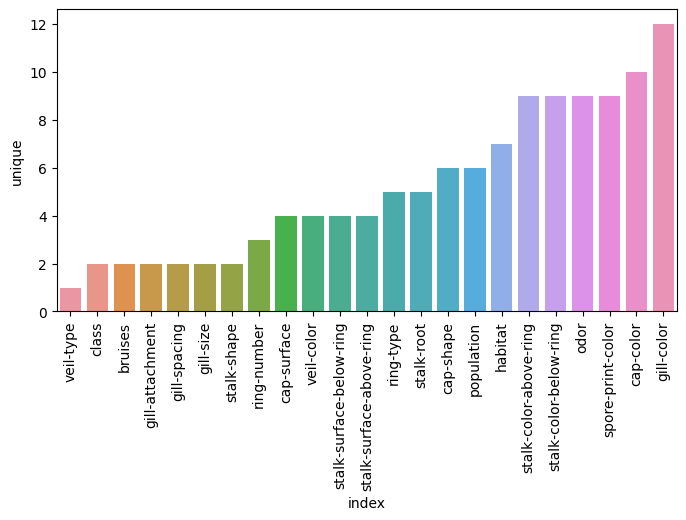

In [ ]:
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(data=df.describe().T.reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

In [ ]:
x = df.drop('class',axis=1)

In [ ]:
x = pd.get_dummies(x,drop_first=True)
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=7)

In [ ]:
x_vd, x_ht, y_vd, y_ht = train_test_split(x_test, y_test, test_size=0.5, random_state=7)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_vd = scaler.transform(x_vd)
x_ht = scaler.transform(x_ht)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_estimators':[50,100,150],'learning_rate':[0.05,0.1,0.2],'max_depth':[2,3,4]}

In [ ]:
grid_model = GridSearchCV(gb_model,param_grid)

In [ ]:
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150]})

In [ ]:
grid_model.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}

In [ ]:
grid_model.best_estimator_.feature_importances_

array([5.11516672e-04, 8.95421936e-18, 0.00000000e+00, 0.00000000e+00,
       1.89361800e-17, 2.23267534e-03, 2.83483290e-17, 2.56402431e-04,
       3.88195190e-18, 0.00000000e+00, 2.50636199e-16, 0.00000000e+00,
       2.52733218e-16, 0.00000000e+00, 0.00000000e+00, 2.12233050e-06,
       0.00000000e+00, 7.69299787e-02, 0.00000000e+00, 1.19105606e-02,
       7.40828260e-03, 1.28270888e-03, 6.10828618e-01, 2.42346527e-02,
       0.00000000e+00, 0.00000000e+00, 2.48355672e-08, 5.73038075e-03,
       5.52556262e-04, 0.00000000e+00, 2.52139986e-16, 1.72363680e-17,
       0.00000000e+00, 9.04872141e-17, 0.00000000e+00, 6.19933410e-16,
       0.00000000e+00, 0.00000000e+00, 1.58009518e-17, 0.00000000e+00,
       0.00000000e+00, 7.70821142e-04, 1.07691042e-01, 1.69981871e-02,
       1.56356724e-02, 1.15824229e-03, 1.04605684e-03, 1.91675640e-09,
       0.00000000e+00, 6.96941181e-04, 4.93674506e-02, 1.42081434e-03,
       0.00000000e+00, 0.00000000e+00, 1.04364532e-03, 0.00000000e+00,
      

In [ ]:
y_pred = grid_model.predict(x_vd)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,plot_roc_curve

In [ ]:
accuracy_score(y_pred,y_vd)

1.0

In [ ]:
confusion_matrix(y_pred,y_vd)

array([[316,   0],
       [  0, 293]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


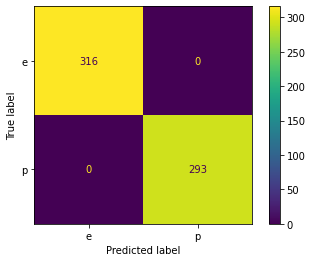

In [ ]:
plot_confusion_matrix(grid_model,x_vd,y_vd)

In [ ]:
print(classification_report(y_pred,y_vd))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       316
           p       1.00      1.00      1.00       293

    accuracy                           1.00       609
   macro avg       1.00      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609



In [ ]:
impt_ftrs = grid_model.best_estimator_.feature_importances_

In [ ]:
impt_ftrs_df = pd.DataFrame(index=x.columns,columns=['importance'],data=impt_ftrs)

In [ ]:
impt_ftrs_df

,importance
cap-shape_c,5.115167e-04
cap-shape_f,8.954219e-18
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,1.893618e-17
...,...
habitat_l,7.560426e-06
habitat_m,3.476624e-16
habitat_p,0.000000e+00
habitat_u,0.000000e+00


In [ ]:
impt_ftrs_df = impt_ftrs_df[impt_ftrs_df['importance'] > 0.0005]

In [ ]:
impt_ftrs_df.sort_values('importance')

,importance
cap-shape_c,0.000512
ring-type_p,0.000541
gill-size_n,0.000553
stalk-surface-below-ring_s,0.000697
stalk-root_b,0.000771
spore-print-color_w,0.000854
stalk-color-above-ring_n,0.001044
stalk-surface-above-ring_s,0.001046
stalk-surface-above-ring_k,0.001158
odor_m,0.001283


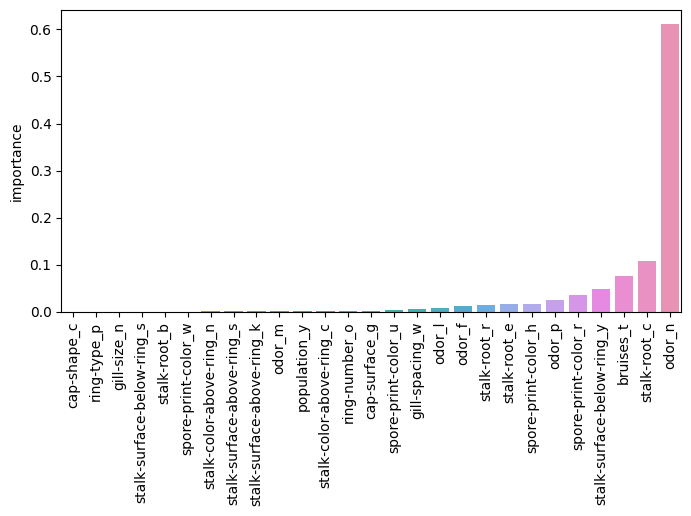

In [ ]:
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(data=impt_ftrs_df.sort_values('importance'),x=impt_ftrs_df.sort_values('importance').index,y='importance')
plt.xticks(rotation=90);

# **kmeans clustering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/CIA_Country_Facts.csv')
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


In [ ]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [ ]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [ ]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [ ]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [ ]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [ ]:
df[df['Literacy (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.000000,8.77,8.27,0.142,0.308,0.550
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,2.826087,14.05,8.70,0.270,0.110,0.620
74,Gaza Strip,NEAR EAST,1428757,360,3968.8,11.11,1.60,22.93,600.0,NaN,244.3,28.95,21.05,50.00,3.000000,39.45,3.80,0.030,0.283,0.687
85,Guernsey,WESTERN EUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,NaN,842.4,NaN,NaN,NaN,3.000000,8.81,10.01,0.030,0.100,0.870
99,Isle of Man,WESTERN EUROPE,75441,572,131.9,27.97,5.36,5.93,21000.0,NaN,676.0,9.00,0.00,91.00,3.000000,11.05,11.19,0.010,0.130,0.860
104,Jersey,WESTERN EUROPE,91084,116,785.2,60.34,2.76,5.24,24800.0,NaN,811.3,0.00,0.00,100.00,3.000000,9.30,9.28,0.050,0.020,0.930
108,Kiribati,OCEANIA,105432,811,130.0,140.94,0.00,48.52,800.0,NaN,42.7,2.74,50.68,46.58,2.000000,30.65,8.26,0.089,0.242,0.668
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,NaN,260.0,22.26,1.81,75.93,3.000000,12.02,8.77,0.118,0.319,0.563
185,Slovakia,EASTERN EUROPE,5439448,48845,111.4,0.00,0.30,7.41,13300.0,NaN,220.1,30.16,2.62,67.22,3.000000,10.65,9.45,0.035,0.294,0.672
187,Solomon Islands,OCEANIA,552438,28450,19.4,18.67,0.00,21.29,1700.0,NaN,13.4,0.64,2.00,97.36,2.000000,30.01,3.92,0.420,0.110,0.470


In [ ]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [ ]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(221, 20)

In [ ]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

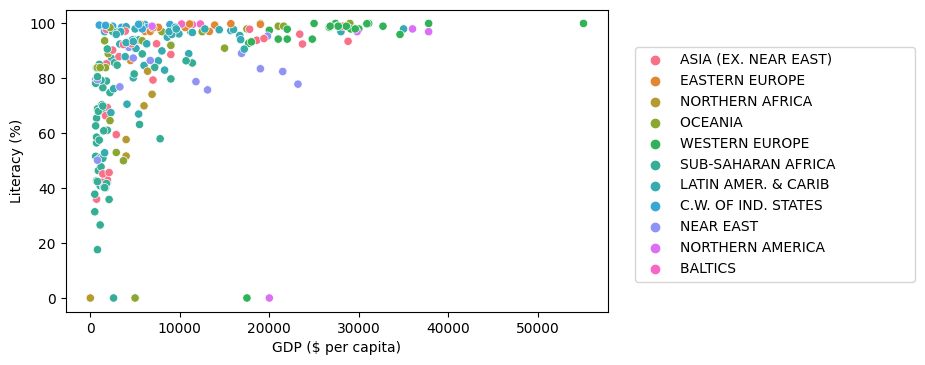

In [ ]:
plt.figure(figsize=(7,4),dpi=100)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region')
plt.legend(loc=(1.05,0.1));

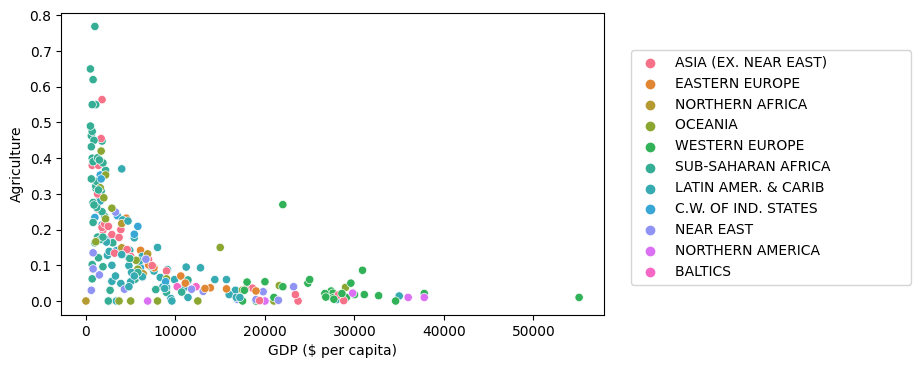

In [ ]:
plt.figure(figsize=(7,4),dpi=100)
sns.scatterplot(data=df,y='Agriculture',x='GDP ($ per capita)',hue='Region')
plt.legend(loc=(1.05,0.1));

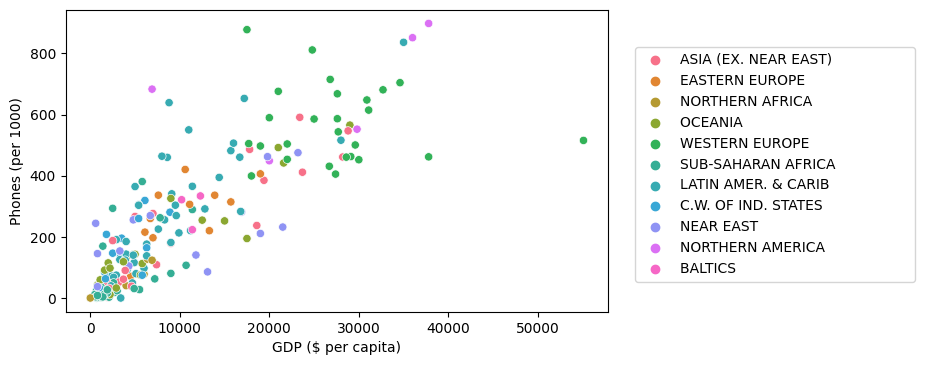

In [ ]:
plt.figure(figsize=(7,4),dpi=100)
sns.scatterplot(data=df,y='Phones (per 1000)',x='GDP ($ per capita)',hue='Region')
plt.legend(loc=(1.05,0.1));

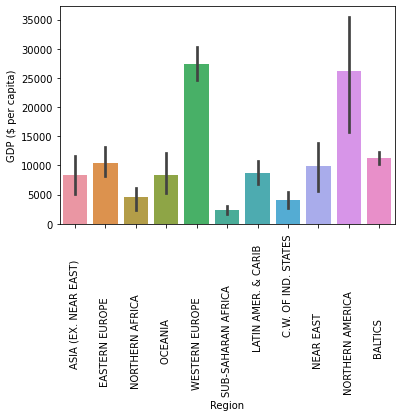

In [ ]:
sns.barplot(data=df,x='Region',y='GDP ($ per capita)')
plt.xticks(rotation=90);

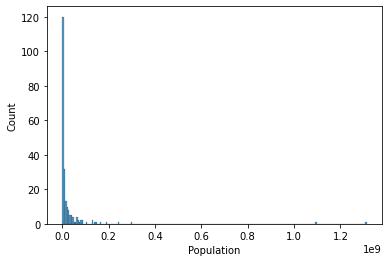

In [ ]:
sns.histplot(data=df,x='Population')

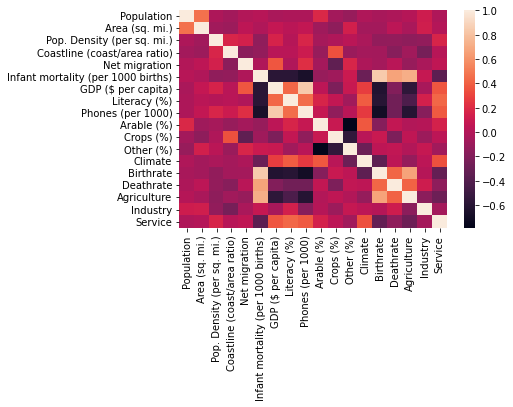

In [ ]:
sns.heatmap(df.corr())

In [ ]:
x = df.drop('Country',axis=1)

In [ ]:
X = pd.get_dummies(x)

In [ ]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
ssd = []

In [ ]:
for k in range(2,31):
  model = KMeans(n_clusters=k)


  model.fit(x)

  ssd.append(model.inertia_)

Text(0, 0.5, 'sum of squared distance')

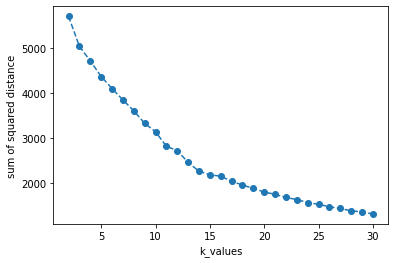

In [ ]:
plt.plot(range(2,31),ssd,'o--')
plt.xlabel('k_values')
plt.ylabel('sum of squared distance')

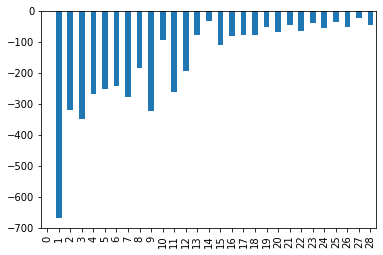

In [ ]:
pd.Series(ssd).diff().plot(kind='bar')

In [ ]:
pd.Series(ssd).diff()

0            NaN
1    -668.232470
2    -320.661716
3    -348.570963
4    -267.533364
5    -252.103350
6    -242.739370
7    -277.687280
8    -186.308516
9    -325.085449
10    -95.150224
11   -262.939194
12   -195.605697
13    -77.433896
14    -35.069354
15   -110.918189
16    -83.138509
17    -77.638783
18    -78.510203
19    -51.504835
20    -68.815340
21    -47.589705
22    -66.808429
23    -38.481365
24    -54.680912
25    -38.065267
26    -52.344510
27    -23.139777
28    -47.322723
dtype: float64

In [ ]:
model = KMeans(n_clusters=3)

In [ ]:
model.fit(x)

KMeans(n_clusters=3)

In [ ]:
model.labels_

array([1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1,
       0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1,
       2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1], dtype=int32)

In [ ]:
X['K=3_Clusters'] = model.labels_

In [ ]:
X.corr()['K=3_Clusters'].sort_values()

Region_WESTERN EUROPE                        -0.689235
GDP ($ per capita)                           -0.519504
Phones (per 1000)                            -0.371306
Net migration                                -0.352953
Deathrate                                    -0.343130
Pop. Density (per sq. mi.)                   -0.226801
Region_SUB-SAHARAN AFRICA                    -0.223181
Climate                                      -0.192894
Region_NORTHERN AMERICA                      -0.125995
Service                                      -0.121303
Infant mortality (per 1000 births)           -0.098829
Region_ASIA (EX. NEAR EAST)                  -0.082050
Other (%)                                    -0.076263
Arable (%)                                   -0.034963
Agriculture                                  -0.029085
Birthrate                                    -0.003529
Area (sq. mi.)                                0.008347
Population                                    0.032464
Coastline 

In [ ]:
iso_codes = pd.read_csv("/content/country_iso_codes.csv")

In [ ]:
iso_codes

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA
...,...,...
296,"Congo, Dem. Rep.",COD
297,"Congo, Repub. of the",COG
298,Tanzania,TZA
299,Central African Rep.,CAF


In [ ]:
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()

In [ ]:
iso_mapping

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [ ]:
df['ISO Code'] = df['Country'].map(iso_mapping)

In [ ]:
df['Cluster'] = model.labels_

In [ ]:
import plotly.express as px

fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster", 
                    hover_name="Country"
                    
                    )
fig.show()

# **DBScan**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/wholesome_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


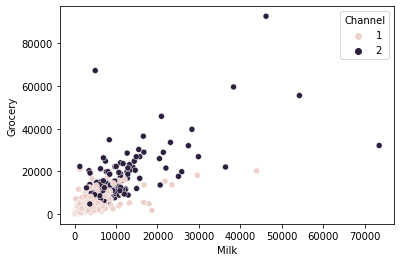

In [ ]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel');

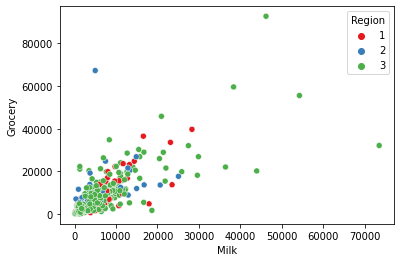

In [ ]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Region',palette='Set1');

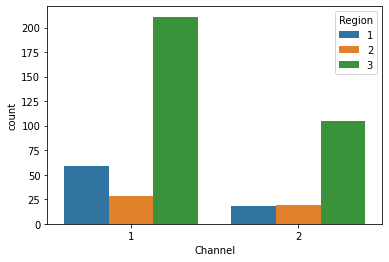

In [ ]:
sns.countplot(x='Channel',data=df,hue='Region')

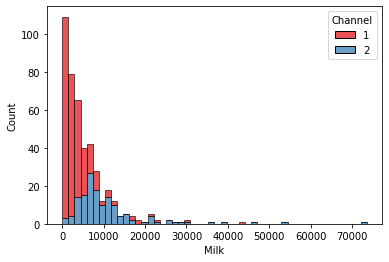

In [ ]:
sns.histplot(data=df,x='Milk',hue='Channel',multiple="stack",palette='Set1');

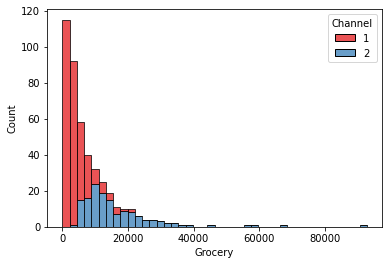

In [ ]:
sns.histplot(data=df,x='Grocery',hue='Channel',multiple="stack",palette='Set1');

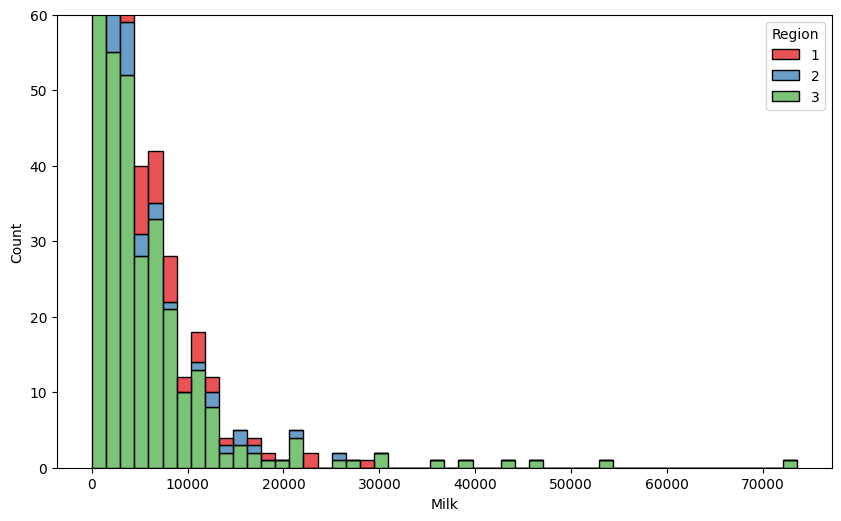

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(data=df,x='Milk',hue='Region',multiple="stack",palette='Set1')
plt.ylim(0,60);

Correlation Between Spending Categories


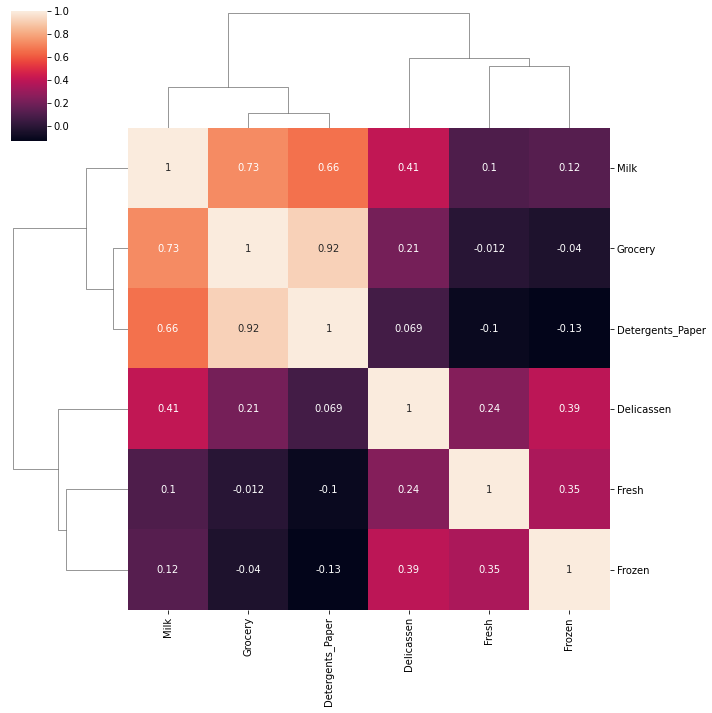

In [ ]:
print('Correlation Between Spending Categories')
sns.clustermap(df.drop(['Region','Channel'],axis=1).corr(),annot=True);

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
outlier_percent = []

In [ ]:
for eps in np.linspace(0.01,3,50):

  model = DBSCAN(eps=eps,min_samples=2*X.shape[1])
  model.fit(X)

  per_out = 100 * np.sum(model.labels_ == -1) / len(model.labels_)

  outlier_percent.append(per_out)

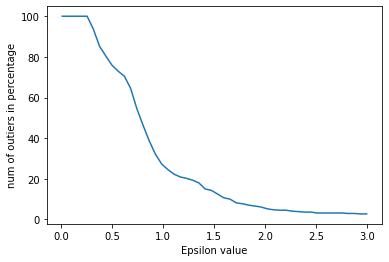

In [ ]:
sns.lineplot(x=np.linspace(0.01,3,50),y=outlier_percent)
plt.xlabel('Epsilon value')
plt.ylabel('num of outiers in percentage');

In [ ]:
db_scan = DBSCAN(eps=2)
db_scan.fit(X)

DBSCAN(eps=2)

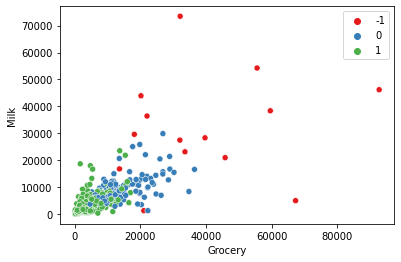

In [ ]:
sns.scatterplot(data=df,x='Grocery',y='Milk',hue=db_scan.labels_,palette='Set1');

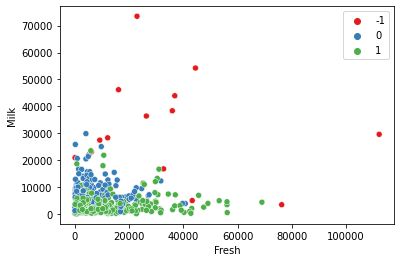

In [ ]:
sns.scatterplot(data=df,x='Fresh',y='Milk',hue=db_scan.labels_,palette='Set1');

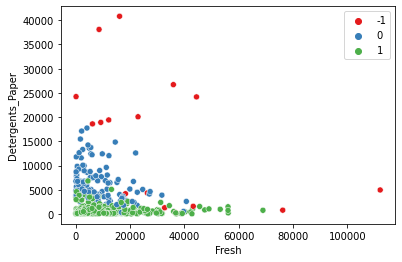

In [ ]:
sns.scatterplot(data=df,x='Fresh',y='Detergents_Paper',hue=db_scan.labels_,palette='Set1');

In [ ]:
df['Labels'] = db_scan.labels_

In [ ]:
new_df = df.drop(['Channel','Region'],axis=1)

In [ ]:
new_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0


In [ ]:
labels_mean = new_df.groupby('Labels').mean()

In [ ]:
labels_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minmax = scaler.fit_transform(labels_mean)

In [ ]:
scaled_label = pd.DataFrame(data=minmax,index=labels_mean.index,columns=labels_mean.columns)

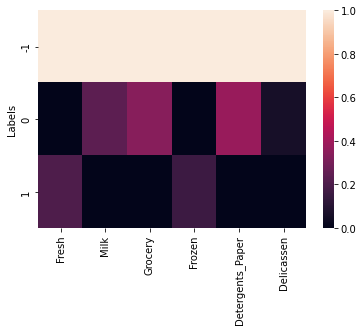

In [ ]:
sns.heatmap(scaled_label);

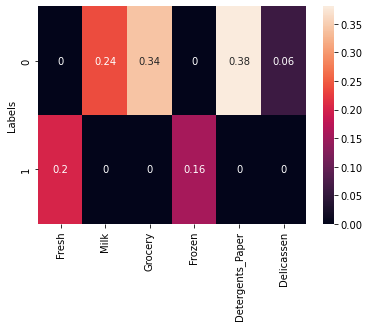

In [ ]:
sns.heatmap(scaled_label.loc[[0,1]],annot=True);

# **PCA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/wine.data.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [ ]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
X = df.drop('Class',axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)

In [ ]:
pca_trans = pca_model.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


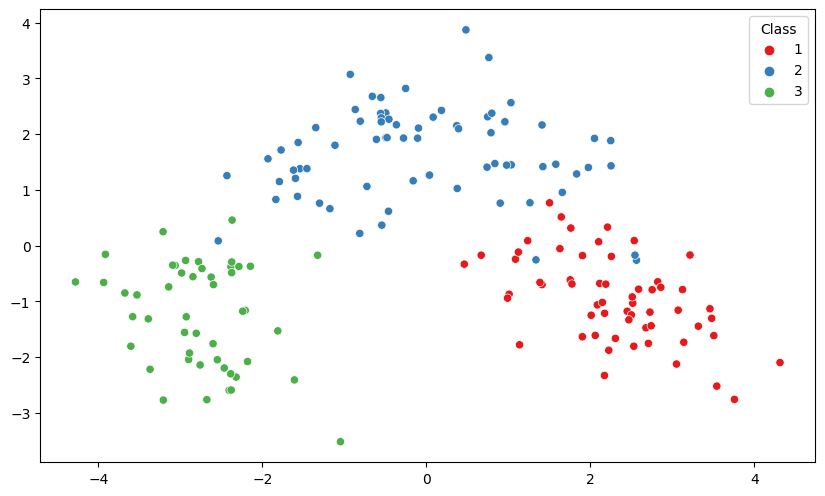

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
labels = df['Class']
sns.scatterplot(pca_trans[:,0],pca_trans[:,1],hue=labels,palette='Set1');

In [ ]:
df_comp = pd.DataFrame(pca_model.components_,index=['pc1','pc2'],columns=X.columns)

In [ ]:
df_comp

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
pc1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
pc2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903


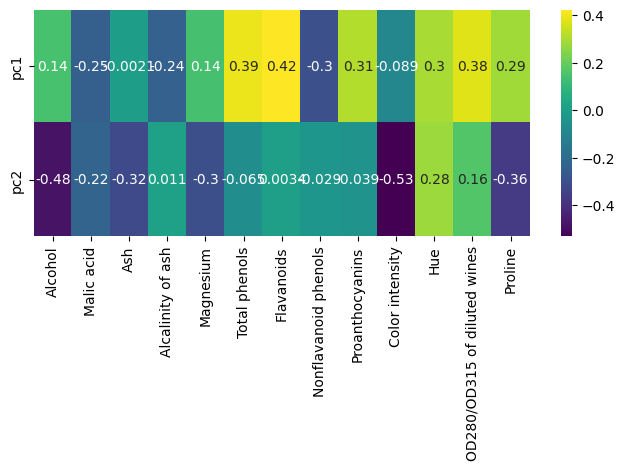

In [ ]:
plt.figure(figsize=(8,3),dpi=100)
sns.heatmap(df_comp,annot=True,cmap='viridis');

In [ ]:
pca_model.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [ ]:
np.sum(pca_model.explained_variance_ratio_)

0.5540633835693529

In [ ]:
explained_variance = []

for n in range(1,14):
    pca = PCA(n_components=n)
    pca.fit(x)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

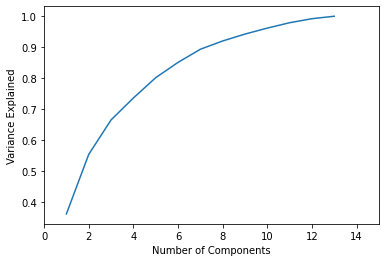

In [ ]:
plt.plot(range(1,14),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")
plt.xlim(0,15);

# **Naive bayes**

## model 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/airline_tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
data = df[['airline_sentiment','text']]

In [ ]:
y = data['airline_sentiment']
x = data['text']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(lowercase=True,stop_words='english')

In [ ]:
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(x_train,y_train)

LinearSVC()

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [ ]:
def report(model):
    preds = model.predict(x_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,x_test,y_test)

NB MODEL
              precision    recall  f1-score   support

    negative       0.76      0.96      0.85      1817
     neutral       0.71      0.36      0.47       628
    positive       0.80      0.51      0.62       483

    accuracy                           0.76      2928
   macro avg       0.75      0.61      0.65      2928
weighted avg       0.75      0.76      0.73      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


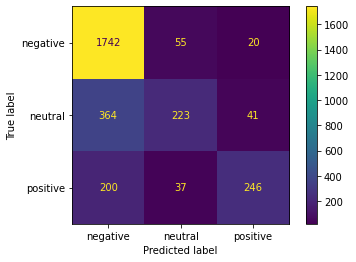

In [ ]:
print("NB MODEL")
report(nb)

svc model
              precision    recall  f1-score   support

    negative       0.84      0.85      0.84      1817
     neutral       0.54      0.55      0.55       628
    positive       0.72      0.68      0.70       483

    accuracy                           0.76      2928
   macro avg       0.70      0.69      0.70      2928
weighted avg       0.76      0.76      0.76      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


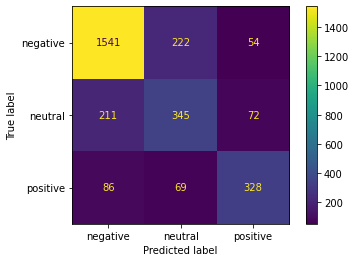

In [ ]:
print("svc model")
report(svc)

## model 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/spam.csv',encoding='cp1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df.rename(columns={'v1':'class_label','v2':'message'},inplace=True)

In [ ]:
#df['class_label'] = df['class_label'].apply(lambda x : 1 if x == 'spam' else 0)

In [ ]:
df.head()

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df[df['message'].str.isspace()]

,class_label,message


In [ ]:
df['class_label'].value_counts()

ham     4825
spam     747
Name: class_label, dtype: int64

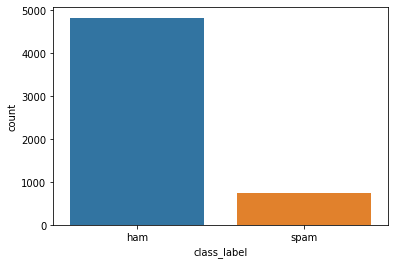

In [ ]:
sns.countplot(data=df,x='class_label');

In [ ]:
x = df['message']

In [ ]:
y = df['class_label']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
tfidf = CountVectorizer(lowercase=True,stop_words='english')

In [ ]:
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(x_train,y_train)

LinearSVC()

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [ ]:
def report(model):
    preds = model.predict(x_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,x_test,y_test)

NB MODEL
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1444
        spam       0.98      0.93      0.95       228

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


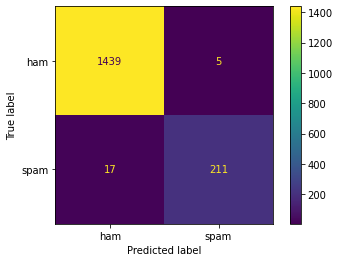

In [ ]:
print("NB MODEL")
report(nb)

svc model
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1444
        spam       0.99      0.85      0.91       228

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


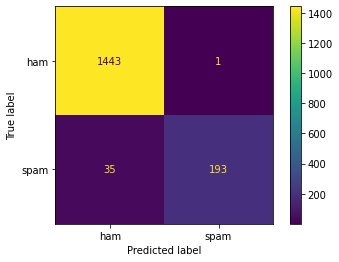

In [ ]:
print("svc model")
report(svc)